## 4.3  KNN
KNN（K-Nearest Neighbor，K近邻法）是一种简单易懂的多分类方法，它也可以被用于回归运算中。

### 4.3.1  什么是KNN 
KNN是一种惰性学习算法，它是基于实例的，并没有经过大量的训练来学习模型或者特征，而是仅仅记住了需要训练的相关实例。KNN是监督学习的一种 。   
KNN是给定测试实例。基于某种距离度量找出训练集中与其最靠近的k个实例点，然后基于这k个最近邻的信息来进行预测，简而言之，需要预测的实例与哪一类离得更近，就属于哪一类。   

### 4.3.2  KNN例子引入
本小节介绍使用KNN处理分类问题，为了便于理解，这里处理二维的数据。例如，在某二维平面内有3种不同的图形，即五角星、三角形、正方形，它们的形状和它们的位置（即在x、y轴的坐标）有关系，现在出现了一个新的点，要将其归为以上3类中的某一类，可采用KNN完成。二维平面示意图如图所示。<img src=".\pic\C5\图片1.png"  width="600">

二维平面示意图   
那么如何使用KNN将新的点进行分类呢？需要给KNN制订步骤：    
（1）计算距离；    
（2）取出距离最近的点，找到新的点与哪一类更接近，观察分类结果。  
依然使用L2距离作为距离度量，计算新的点（测试点）到每一个已知点（标签点）的L2距离并比对距离，是只需要寻找最近的一个标签点作为测试点的标签就可以吗？答案是否定的，KNN最简单的思想是：找到与预测数据最相近的k个数据，然后对预测数据进行投票，票数最高的标签作为预测数据的标签。当k=1时，K近邻算法就变成了近邻算法。比较不同的k值对分类效果的影响，使用L2距离的分类器画出五角星、三角形、正方形3种分类的决策边界，决策边界一侧的所有点属于一个类，另一侧的所有点属于另一个类，在二维平面内表示，不同颜色代表一类，k=1时的决策边界如图所示。  
  <img src=".\pic\C5\图片2.png"  width="600">
$$k=1时的决策边界  $$
k=5时的决策边界如图所示。   
<img src=".\pic\C5\图片3.png"  width="600">
$$k=5时的决策边界$$
在k=1时，异常的数据点（五角星区域的三角形）创造了一个非正常的预测区域；而k=5时，这个区域消失了，决策边界更加平滑，针对测试数据的泛化能力更好。在KNN算法中，k越小，学习结果就越有可能被“局部信息”所左右，所以k的取值很重要。   
在KNN分类器中，需要人为选择不同的距离函数以及k的不同取值等，需要人为确定的参数称为超参数（Hyperparameter）。    

### 4.3.3  数学方法解决KNN问题
本小节介绍通过数学方法对引出的例子使用KNN分类，需要计算新出现的测试点到各个五角星、三角形、正方形的距离，得到距离后比较各个距离的远近，选取k个近距离后查看哪个类的较多，新的测试点就属于哪一类，完成分类。    
接下来就按这个逻辑顺序完成基于L2距离的KNN分类，在machine_learning项目下新建knn.py。    

1．导入必要的库

In [1]:
import matplotlib.pyplot as plt
from collections import Counter
from math import sqrt
import numpy as np

NumPy库负责转换数据类型，Matplotlib库的pyplot库负责画出图像，Math库的sqrt()函数负责求开方，Collections的Counter()函数负责标签的计数。

2．在二维平面上创造一些数据

In [27]:
raw_data_X = [[3.85, 3.05],
                   [1.57, 2.63],
                   [4.28, 4.42],
                   [5.68, 3.64],
                   [1.94, 3.68],
                   [2.49, 2.66],
                   [0.49, 3.66],

                   [0.12, 1.12],
                   [2.25, 2.04],
                   [0.23, 0.54],
                   [1.33, 1.49],
                   [2.35, 0.09],
                   [1.46, 1.63],
                   [3.66, 3.93],

                   [5.11, 0.39],
                   [5.69, 1.14],
                   [4.03, 2.49],
                   [4.92, 1.62],
                   [5.26, 2.05],
                   [4.26, 2.05],
                   [5.84, 1.31]]
raw_data_X = []
for i in range(21):                 
    x1 = np.random.uniform(8)
    x2 = np.random.uniform(5)
    raw_data_X.append([x1,x2])
raw_data_Y = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2]

数据分为3类，横坐标范围为0～8，纵坐标范围为0～5。数据可以自己写或者使用随机数生成。创建两个列表，raw_data_X是坐标数据，raw_data_Y是标签。
3．将列表转换为NumPy

In [28]:
x_train = np.array(raw_data_X)
y_train = np.array(raw_data_Y)
print(x_train)
print(y_train)

[[1.69893825 2.98668983]
 [7.6373885  1.87061155]
 [5.38354236 4.0941091 ]
 [6.10710113 4.10467584]
 [5.19823219 4.87252289]
 [3.9460782  2.82517996]
 [1.7646827  2.15748761]
 [2.41474693 2.64011907]
 [7.01904165 4.34497326]
 [7.31929789 4.03142831]
 [1.31976184 3.1189209 ]
 [7.0769383  1.8502442 ]
 [1.29198806 2.76557871]
 [1.25799997 4.21423471]
 [1.55890769 2.00332655]
 [7.8826031  2.467345  ]
 [3.69737586 2.45692628]
 [1.28521494 1.28295032]
 [6.3845578  1.85310543]
 [1.52538948 2.47806892]
 [2.79287001 3.03842007]]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2]


使用np.array()函数进行类型转换。   
4．新建一个测试点

In [30]:
x_test = np.array([3.35, 2.46])

将列表转换成NumPy数据类型。   
5．绘制散点图

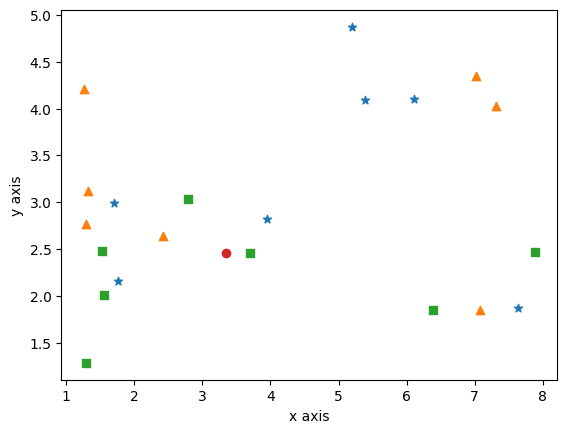

In [31]:
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.scatter(x_train[y_train == 0,0], x_train[y_train == 0,1], marker = "*")
plt.scatter(x_train[y_train == 1,0], x_train[y_train == 1,1], marker = "^")
plt.scatter(x_train[y_train == 2,0], x_train[y_train == 2,1], marker = "s")
plt.scatter(x_test [0], x_test [1], marker = "o")
plt.show()

plt.xlabel()函数绘制x轴的标签“x轴”，plt.ylabel()函数绘制y轴的标签“y轴”，使用plt.scatter()函数绘制散点图，使用plt.show()函数显示图像，显示结果如图所示。   
  

  
6．创建训练函数   

In [33]:
def train(X, y):
       Xtr = X
       Ytr = y
       return Xtr, Ytr

由于KNN的特性，所以直接将输入赋值给输出。   
7．创建预测函数

In [35]:
def predict_math (X, xtrain, ytrain):
      # 求L2距离
      distances = [sqrt(np.sum((X_train - X) ** 2)) for X_train in xtrain]
      # 对数组进行排序，返回的是值的索引值
      nearest = np.argsort(distances)
      # 取出前3个离得最近的点的标签
      k = 3
      topK_y = [ytrain[i] for i in nearest[:k]]
      # 计数，取到键值对。键：标签；值：个数
      votes = Counter(topK_y)
      # 在键值对中值最多的键
      print(votes.most_common(1)[0][0])

       整体思路为：首先，计算预测的点到训练的点的L2距离，得到距离后组成列表，利用np.argsort()函数将该列表排序，返回索引值；接下来取出3个离得最近的点的标签，即k=3；最后将结果组成键值对，键为标签，值为标签的个数，得到键值对中值最多的键，即可得到分类标签。        
   9．修改预测函数  

In [37]:
def predict_math(X, xtrain, ytrain):
      # 求L2距离
      distances = [sqrt(np.sum((X_train - X) ** 2)) for X_train in xtrain]
      # 对数组进行排序，返回的是值的索引值
      nearest = np.argsort(distances)
      # 取出前3个离得最近的点的标签
      k = 3
      topK_y = [ytrain[i] for i in nearest[:k]]
      # 计数，取到键值对。键：标签；值：个数
      votes = Counter(topK_y)
      # 在键值对中值最多的键
      print(votes.most_common(1)[0][0])

      # 得到最接近的3个点的索引值
      k = 3
      topK_X = nearest[:k]
      for i in range(3):
           # 绘制预测点与最接近的3个点连成的直线
           plt.plot([X[0], xtrain[topK_X[i]][0]], [X[1], xtrain[topK_X[i]][1]])
           # 绘制预测点与最接近的3个点之间的长度
           plt.annotate("%s"%round(distances[topK_X[i]], 2),
                              xy=((X[0] + xtrain[topK_X[i]][0]) / 2,(X[1] + xtrain[topK_X[i]][1]) / 2))
      plt.xlabel('x轴')
      plt.ylabel('y轴')
      plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], marker="*")
      plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], marker="^")
      plt.scatter(x_train[y_train == 2, 0], x_train[y_train == 2, 1], marker="s")
      plt.scatter(x_test[0], x_test[1], marker="o")
      plt.show()

2


D:\CHENGXU\ANACONDA\envs\tf\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


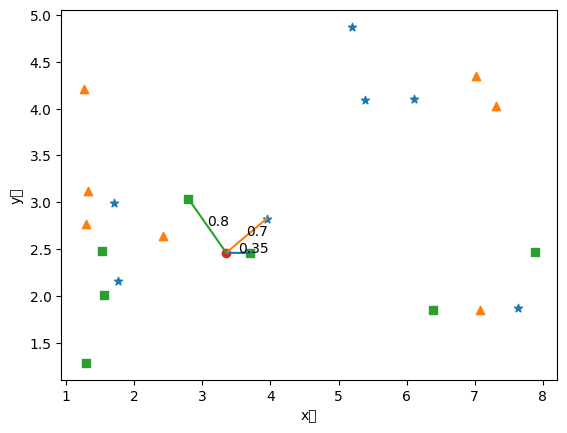

In [38]:
xtrain, ytrain = train(x_train, y_train)
predict_math (x_test, xtrain, ytrain)

k=3时认为测试点属于第0个类别，即五角星的类别。此时直接输出不是非常直观，为了便于理解，将结果绘制出来。    
8．调用训练函数与预测函数，完成预测 

在输出所属类别的基础上绘制预测点与最接近的3个点连成的直线，并标出它们的距离，KNN结果如图所示。

KNN结果

### 4.3.4  利用TensorFlow解决KNN问题   
在使用TensorFlow实现KNN时，创造数据、数据训练的过程与使用数学方法实现KNN是一致的，只需要修改predict()函数即可。这里依然在knn.py文件中完成预测函数，直接新建一个函数predict_tf()，在该函数中编写代码。     
下面介绍完成基于TensorFlow的KNN运算的步骤。     

1．导入必要的库  

In [47]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


需要导入TensorFlow的库。
2．完成预测函数

In [48]:
def predict_tf(X, xtrain, ytrain):
      # 定义变量大小
      xtr = tf.placeholder("float", [None, 2])
      xte = tf.placeholder("float", [2])
      # 计算L2距离
      # tf.negative()函数用于取相反数
      # 调用reduce_sum(arg1, arg2)时，参数arg1即为和的数据，arg2可以取0和1
      # 当arg2 = 0时，是纵向对矩阵求和，原来的矩阵有几列就得到几个值
      # 当arg2 = 1时，是横向对矩阵求和；当省略arg2参数时，默认对矩阵所有元素进行求和
      distance = tf.sqrt(tf.reduce_sum(tf.square(tf.add(xtr, tf.negative(xte))), reduction_indices=1))
      with tf.Session() as sess:
            # 添加用于初始化变量的节点
            sess.run(tf.global_variables_initializer())
            # 近邻算法：将测试集与训练集进行对比，返回误差最小的下标
            nn_index = sess.run(distance, feed_dict={xtr: xtrain, xte: X})
            # 对数组进行排序，返回的是值的下角标
            nearest = np.argsort(nn_index)
            # 取出前3个离得最近的点的标签
            k = 3
            topK_y = [ytrain[i] for i in nearest[:k]]
            # 计数，取到键值对。键：标签；值：个数
            votes = Counter(topK_y)
            # 在键值对中值最多的键
            print(votes.most_common(1)[0][0])

In [49]:
xtrain, ytrain = train(x_train, y_train)
predict_tf(x_test, xtrain, ytrain)

2


该程序实现了基于TensorFlow的KNN运算，得到它的分类为五角星类别。    
KNN的特点是思想比较简单，应用数学少，是一个几乎不需要训练过程的算法。因为其训练过程只是将训练集数据存储起来，所以算法的训练不需要花费较多时间。这显然是一个缺点，虽然训练不需要花费较多时间，但是时间都花费在了测试上。如果训练中有m个样本、n个特征，那么每预测一个新的数据都需要计算这一个数据和所有m个样本之间的距离，测试的时候，每计算一个距离就要使用O(n)的时间复杂度，计算m个样本之间的距离，就要使用O(m×n)的时间复杂度。这与正常情况是不相符的，正常情况希望训练时间较长，但是测试时间要短。
对KNN算法有很多优化方式，如运用k-d树或者K-Means，尽管如此，KNN算法依然是一个效率比较低的算法，但是在维数较低的情况下是不错的选择。   

## 4.4  使用第三方模块实现KNN
Python有很多第三方模块，可以直接调用一些机器学习算法的接口，而无须自己搭建算法，如Scikit-learn（Sklearn），该第三方模块对常用的机器学习方法进行了封装，包括回归（Regression）、降维（Dimensionality Reduction）、分类（Classfication）、聚类（Clustering）等方法。本节通过Scikit-learn库实现使用KNN算法演示第三方库。    
在4.3节的图中绘制了KNN的决策边界，该决策边界是基于Scikit-learn库的neighbors模块，使用KNN算法的预测功能实现的。    
首先安装Scikit-learn库，在交互模式（联网状态）下输入：     
pip install scikit-learn==0.20.2    
安装完成后，在交互模式下输入“import sklearn”，查看是否报错，不报错则表示安装成功
接下来绘制KNN决策边界，在machine_learning项目下新建Decision_boundary.py。  

1．导入必要的库

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

2．创建KNN类
由于数据集在二维平面内，所以在类的初始化函数中创造数据集的横纵坐标以及对应的标签。

In [68]:
class KNNDeal:
        def __init__(self):
            self.__module__ = "这是绘制KNN的决策边界代码"
            # self.raw_data_X = [[3.85, 3.05],
            #                    [1.57, 2.63],
            #                    [4.28, 4.42],
            #                    [5.68, 3.64],
            #                    [1.94, 3.68],
            #                    [2.49, 2.66],
            #                    [0.49, 3.66],

            #                    [0.12, 1.12],
            #                    [2.25, 2.04],
            #                    [0.23, 0.54],
            #                    [1.33, 1.49],
            #                    [2.35, 0.09],
            #                    [1.46, 1.63],
            #                    [3.66, 3.93],

            #                    [5.11, 0.39],
            #                    [5.69, 1.14],
            #                    [4.03, 2.49],
            #                    [4.92, 1.62],
            #                    [5.26, 2.05],
            #                    [4.26, 2.05],
            #                    [5.84, 1.31]
            #                    ]
            self.raw_data_X = []
            for i in range(21):                 
                x1 = np.random.uniform(8)
                x2 = np.random.uniform(5)
                self.raw_data_X.append([x1,x2])
            self.raw_data_Y = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2];
            self.x_train = np.array(self.raw_data_X)
            self.y_train = np.array(self.raw_data_Y)
# 3．在类内新增knn_predict()函数 knn_predict()函数的作用是使用KNN网络实现边界预测，参数为KNN模型和数据集。 转换数据类型并使用KNN网络预测
        def knn_predict(self, model, axis):
            x0, x1 = np.meshgrid(
            np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
            np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
            )
            X_new = np.c_[x0.ravel(), x1.ravel()]

            y_predict = model.predict(X_new)
            zz = y_predict.reshape(x0.shape)

            custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

            plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
# 4．在类内新增display_decision_boundary()函数,display_decision_boundary()函数用于显示KNN的决策边界。
        def display_decision_boundary(self, n_neighbors):
            knn_clf_1 = KNeighborsClassifier(n_neighbors)
            knn_clf_1.fit(self.x_train, self.y_train)

            self.knn_predict(knn_clf_1, axis=[0, 8, 0, 5])
            plt.xlabel('x axis')
            plt.ylabel('y axis')
            plt.scatter(self.x_train[self.y_train == 0, 0], self.x_train[self.y_train
            == 0, 1], marker="*")
            plt.scatter(self.x_train[self.y_train == 1, 0], self.x_train[self.y_train
            == 1, 1], marker="^")
            plt.scatter(self.x_train[self.y_train == 2, 0], self.x_train[self.y_train
            == 2, 1], marker="s")
            plt.show()


5．新建对象  

In [69]:
knn = KNNDeal() 

 
6．基于KNN算法显示预测后的决策边界   
display_decision_boundary()函数的参数为最近邻的超参数k。图4-16的超参数k为1，图4-17的超参数k为5。 

C:\Users\wwwfg\AppData\Local\Temp\ipykernel_56988\127361425.py:49: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


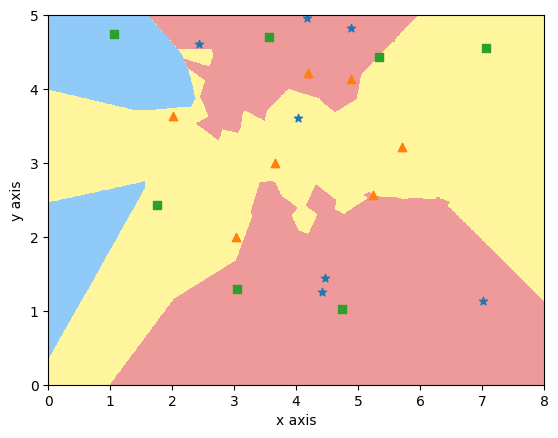

In [70]:
knn.display_decision_boundary(5) 

  
除了Scikit-learn库外，还有很多第三方库拥有机器学习或者深度学习的API，读者可以多多学习。   

## 4.5  其他机器学习算法   
除了前面介绍的机器学习算法之外，还有很多其他机器学习算法。  
### 4.5.1  支持向量机   
支持向量机（SVM）是一种有监督学习的算法，它可用于分类和回归分析，多用于分类问题中。该算法会根据特征值构建一个n维空间，即n个数据特征，并把数据点投影到该空间内，之后寻找一个超平面，将空间内的数据分开，如图所示。  
<img src=".\pic\C5\图片4.png"  width="600">
$$支持向量机$$   
这个超平面是否合格的判断标准是：此超平面到最近元素的距离最远。在二维空间内，超平面就是一条直线。图中，实线表示找到的最佳超平面，虚线表示没有找到最佳超平面。  
### 4.5.2  决策树  
决策树是一种有监督学习的算法，主要用于分类问题中。决策树可以理解为这样一棵树：这棵树上有很多的分支节点，每个分支代表一个选项，每个叶节点表示最终做出的决策。生成的树示例如图所示。   
<img src=".\pic\C5\图片5.png"  width="600">
$$生成的树示例$$  
### 4.5.3  随机森林   
随机森林是有监督的集成学习模型，主要用于分类和回归。随机森林建立了很多决策树并将其集成，以获得更准确、更稳定的预测。
### 4.5.4  K-均值聚类 
K-均值聚类（K-Means）是一种无监督学习算法。聚类算法用于把族群或数据点分割成一系列的族，使得相同族中的数据点比其他族更相似。K-均值聚类是把所有数据分成k个族，同一族中的所有项彼此尽量相似，不同族中的项尽量不同。每个族中有一个形心，形心为最能代表族的点。  